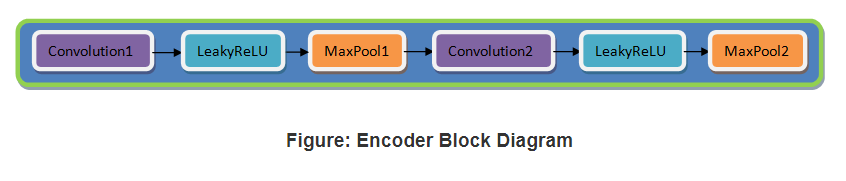

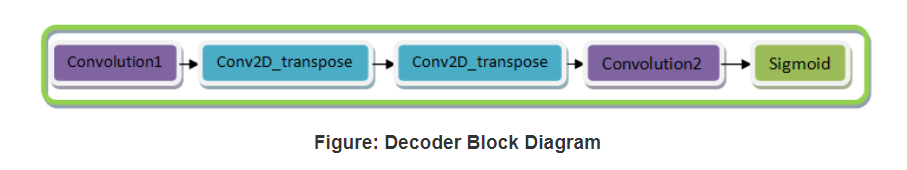

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

- retrieve the last layer of the autoencoder model
- decoder_layer = autoencoder.layers[-1] #?????

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1] #?????
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
# use a per-pixel binary crossentropy loss, and the adadelta optimizer.
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print('...........................................')
print (x_test.shape)

(60000, 784)
...........................................
(10000, 784)


- notice data loaded into fit function.
-  because of input and output is x_train, so input and output use the same data.


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.3756 - val_loss: 0.2737
Epoch 2/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.2673 - val_loss: 0.2580
Epoch 3/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2481 - val_loss: 0.2354
Epoch 4/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2264 - val_loss: 0.2157
Epoch 5/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2097 - val_loss: 0.2016
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1977 - val_loss: 0.1913
Epoch 7/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.1888 - val_loss: 0.1836
Epoch 8/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1819 - val_loss: 0.1775
Epoch 9/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.1764 - val_loss: 0.1724
E

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

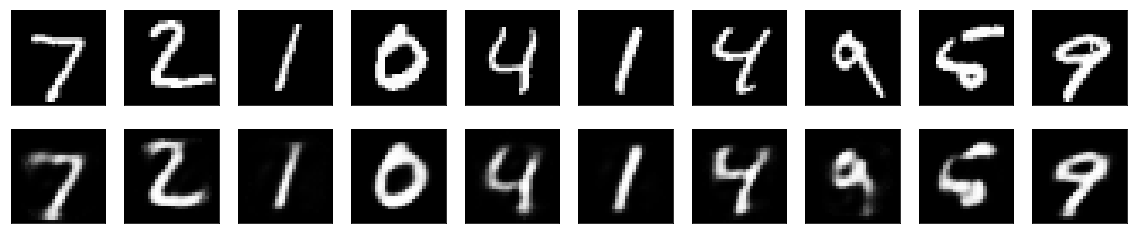

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### add sparsity constraint on the encoded representation

In [ ]:
# add a sparisity constraint on the encoded representations
# another way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

#### Deep AutoEncoder

In [10]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [11]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 137us/step - loss: 0.3499 - val_loss: 0.2643
Epoch 2/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.2592 - val_loss: 0.2537
Epoch 3/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.2446 - val_loss: 0.2341
Epoch 4/100
60000/60000 [==============================] - 8s 126us/step - loss: 0.2275 - val_loss: 0.2197
Epoch 5/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.2131 - val_loss: 0.2041
Epoch 6/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.1990 - val_loss: 0.1925
Epoch 7/100
60000/60000 [==============================] - 8s 138us/step - loss: 0.1899 - val_loss: 0.1845
Epoch 8/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.1821 - val_loss: 0.1780
Epoch 9/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.1768 - val_

60000/60000 [==============================] - 7s 119us/step - loss: 0.1065 - val_loss: 0.1059
Epoch 77/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1063 - val_loss: 0.1057
Epoch 78/100
60000/60000 [==============================] - 8s 126us/step - loss: 0.1060 - val_loss: 0.1048
Epoch 79/100
60000/60000 [==============================] - 8s 136us/step - loss: 0.1058 - val_loss: 0.1053
Epoch 80/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.1055 - val_loss: 0.1054
Epoch 81/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1052 - val_loss: 0.1041
Epoch 82/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.1051 - val_loss: 0.1043
Epoch 83/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.1049 - val_loss: 0.1043
Epoch 84/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1047 - val_loss: 0.1047
Epoch 85/100
60000/60000 [===============

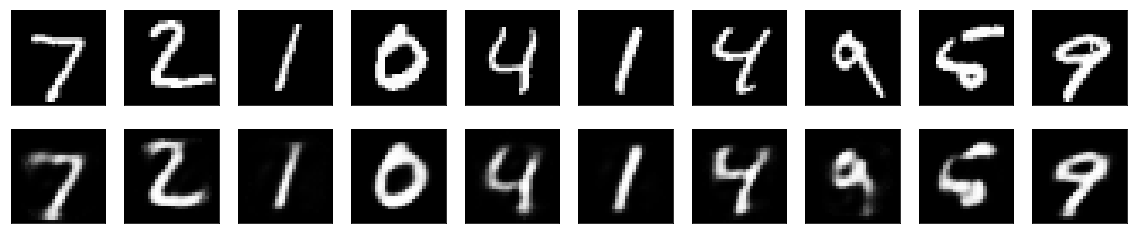

In [12]:
decoded_imgs=autoencoder.predict(x_test)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional AutoEncoder

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) # 28,28,16
x = MaxPooling2D((2, 2), padding='same')(x) # 28,28,16
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) #28,28,8
x = MaxPooling2D((2, 2), padding='same')(x) # 28,28,8
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

-  to train it , I use the original MNIST digits with shape(Nsamples,3,28,28), and I just need to normalize pixel values between 0 and 1.

- 

In [14]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [15]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='autoencoder')])

Instructions for updating:
Use the retry module or similar alternatives.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2311 - val_loss: 0.1775
Epoch 2/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1638 - val_loss: 0.1561
Epoch 3/50
60000/60000 [==============================] - 137s 2ms/step - loss: 0.1504 - val_loss: 0.1433
Epoch 4/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1418 - val_loss: 0.1372
Epoch 5/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.1354 - val_loss: 0.1322
Epoch 6/50
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1307 - val_loss: 0.1290
Epoch 7/50
60000/60000 [==============================] - 139s 2ms/step - loss: 0.1273 - val_loss: 0.1257
Epoch 8/50
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1235 - val_loss: 0.1207
Epoch 9/50
60000/60000 [=====

In [ ]:
# use this code to open tensorboard in the termianl
tensorboard --logdir=/tmp/autoencoder

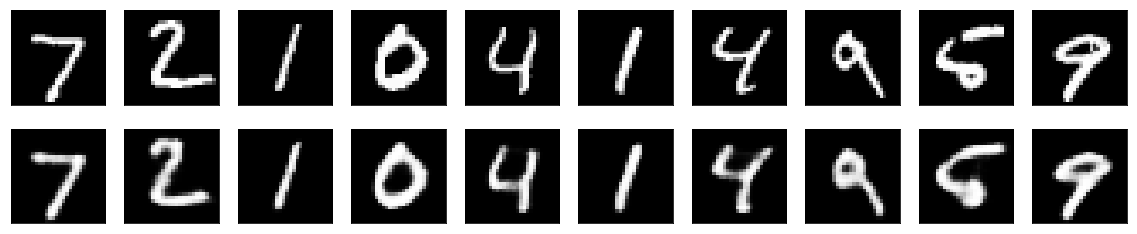

In [19]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application to image denoising 
- CNN to work on an image denoising problem.
- 

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

### Sequence-to-sequence autoencoder
- 

In [ ]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

# variational autoencoder- VAE
-  It's a type of autoencoder with added constraints on the encoded representations being learned.
- 

In [ ]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [ ]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [ ]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)

In [ ]:
def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) * epsilon_std
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()